In [1]:
import os
import json
import numpy as np
from quinine import QuinineArgumentParser
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import copy
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm.notebook import tqdm

from pathlib import Path


In [2]:
# Hypothesis 1, runs
result_dir = '../results2/model_probe/'

# Specify names of the appropriate runs
result_name = {
    'Wols':{
        'unloop': '0804004540_unloop_lr=0.001_target=Wols_control=False_806a_Prob-base-hyp1',
        'loop': '0804041333_loop_lr=0.001_target=Wols_control=False_911a_Prob-base-hyp1'
    }
}

In [3]:
fig_hparam = {
    'figsize': (8, 3),
    'labelsize': 28,
    'ticksize': 20,
    'linewidth': 5,
    'fontsize': 15,
    'titlesize': 20,
    'markersize': 15
}

# font specification
fontdict = {'family': 'serif',
         'size': fig_hparam['fontsize'],
         }

unloop_color = '#3b4cc0'
loop_color = '#b40426'

In [8]:
# Overwrite for Hyp1

fig_hparam = {
    'figsize': (24, 8),
    'labelsize': 28,
    'ticksize': 20,
    'linewidth': 5,
    'fontsize': 15,
    'titlesize': 20,
    'markersize': 15
}

Wols unloop
tensor([0.4973, 0.4895, 0.4934, 0.4901, 0.4719, 0.4835, 0.4739, 0.4729, 0.4676,
        0.4639, 0.4538, 0.4484, 0.4480, 0.4498, 0.4425, 0.4407, 0.4404, 0.4432,
        0.4446, 0.4470, 0.4468])
Wols loop
tensor([0.4905, 0.4817, 0.4822, 0.4867, 0.4860, 0.4895, 0.4855, 0.5012, 0.4883,
        0.4930, 0.5013, 0.5006, 0.4998, 0.4997, 0.5007, 0.4992, 0.4927, 0.4910,
        0.4865, 0.4847, 0.4828, 0.4797, 0.4767, 0.4741, 0.4711, 0.4724, 0.4706,
        0.4704, 0.4693, 0.4665, 0.4672, 0.4670, 0.4673, 0.4675, 0.4646, 0.4678,
        0.4665, 0.4689, 0.4665, 0.4696, 0.4663, 0.4667, 0.4678, 0.4660, 0.4670,
        0.4683, 0.4697, 0.4640, 0.4656, 0.4661, 0.4667, 0.4639, 0.4662, 0.4648,
        0.4652, 0.4668, 0.4648, 0.4628, 0.4648, 0.4628, 0.4604, 0.4607, 0.4645,
        0.4625, 0.4646, 0.4594, 0.4642, 0.4628, 0.4614, 0.4616, 0.4581, 0.4589,
        0.4622, 0.4589, 0.4613, 0.4617, 0.4626, 0.4612, 0.4591, 0.4578, 0.4600,
        0.4594, 0.4621, 0.4564, 0.4610, 0.4583, 0.4582, 0.4575, 0

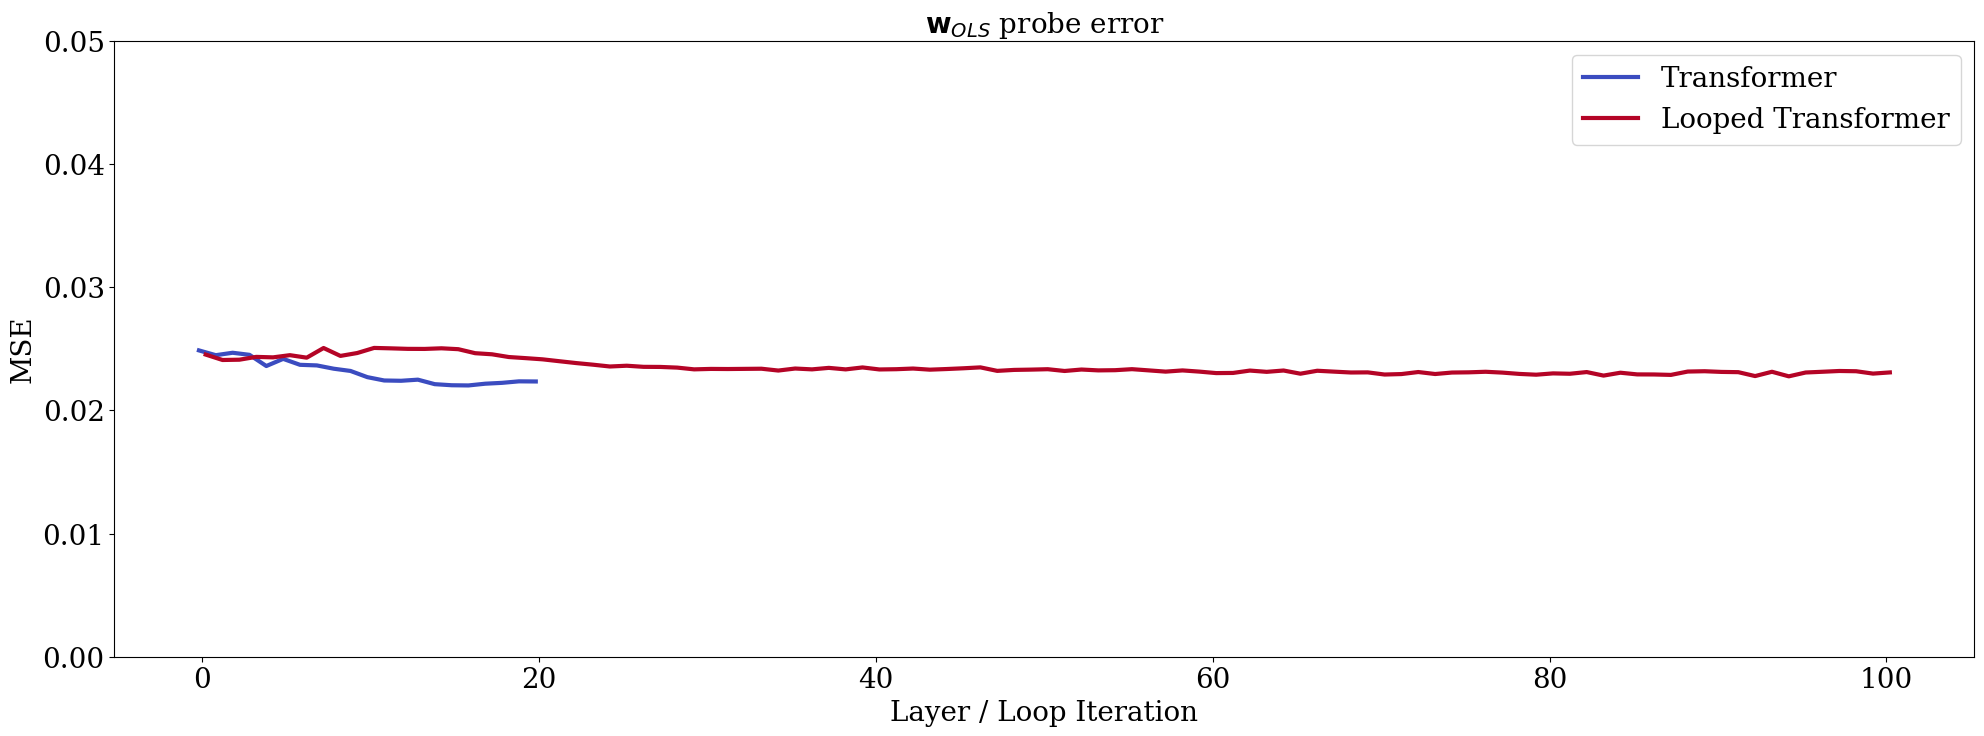

In [18]:
for target_mode in result_name.keys():
    fig, ax = plt.subplots(1, figsize=fig_hparam['figsize'])
    for loop_mode in result_name[target_mode]:
        print(target_mode, loop_mode)
        if loop_mode == 'unloop':
            offset = -0.2
            color = unloop_color
            label = 'Transformer'
        else:
            offset = 0.2
            color = loop_color
            label = 'Looped Transformer'
        filename = result_name[target_mode][loop_mode]
        tmp = torch.load(result_dir + filename + '/state_dict.pt', map_location=torch.device('cpu'))
        print(tmp['p_loss'])

        plt.rc('font', family='serif')
        # ax.bar(np.arange(tmp['p_loss'].shape[0]) + offset, tmp['p_loss'] / 20, 0.4, label=label, color=color)
        ax.plot(np.arange(tmp['p_loss'].shape[0]) + offset, tmp['p_loss'] / 20, linewidth=3, label=label, color=color)
        
#         # load the control=True results
#         filename = control_result_name[target_mode][loop_mode]
#         tmp = torch.load(result_dir + filename + '/state_dict.pt', map_location=torch.device('cpu'))
# #         print(tmp['p_loss'])
#         ax.axhline(tmp['p_loss'].min() / 20, color=color, ls='--')

    plt.ylim([0, 0.05])
    plt.xlabel('Layer / Loop Iteration', fontsize=20)
    plt.ylabel('MSE', fontsize=20)
    plt.tick_params(axis='both', labelsize=fig_hparam['ticksize'])
    if target_mode == 'grad':
        plt.title(r"$X^TY$ probe error", fontsize=20)
    else:
        plt.title(r"$\mathbf{w}_{OLS}$ probe error", fontsize=20)
    plt.legend(fontsize=20)
        
    dir_save = Path("result_folder/Figures/")
    dir_save.mkdir(exist_ok=True, parents=True)
    plt.savefig(dir_save/f"model_probe_{target_mode}_line.png", format='png', dpi=600, bbox_inches='tight')
    
    plt.show()